In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
marketing_df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
marketing_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# 1. Show DataFrame info.
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# 2. Describe DataFrame.
marketing_description = marketing_df.describe()
marketing_description

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
# 3. Show a plot of the total number of responses.
marketing_count = pd.DataFrame(marketing_description.loc['count',:])
marketing_count.index.name = 'columns'
marketing_count = marketing_count.reset_index()

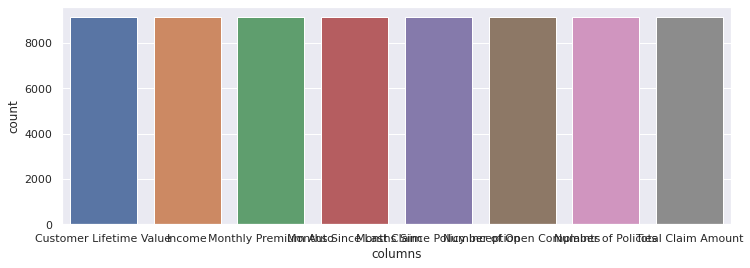

In [8]:
sns.set(rc={'figure.figsize':(12,4)})
g = sns.barplot(x = 'columns', y = 'count', data=marketing_count)
plt.show(g)

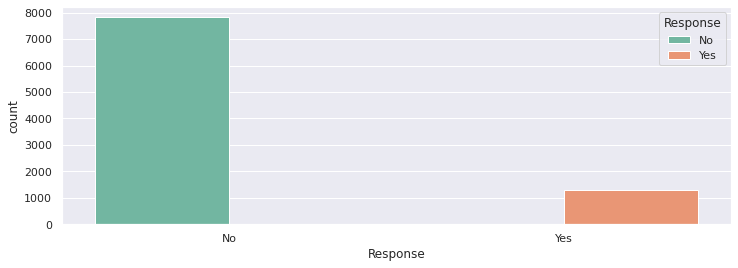

In [9]:
#Number of responses
sns.countplot(x="Response", data=marketing_df, hue="Response", palette="Set2")
plt.show()

In [10]:
# 4. Show a plot of the response rate by the sales channel. (I understood rate as the percentaje of 'yes' answers)
resp_by_sales = marketing_df[['Response','Sales Channel']]
resp_by_sales = resp_by_sales.pivot(columns = 'Sales Channel', values = 'Response')
resp_by_sales_rate = (resp_by_sales == 'Yes').sum()/resp_by_sales.shape[0]*100
resp_by_sales_rate = resp_by_sales_rate.reset_index()
resp_by_sales_rate.columns = ['Sales','Rate']
resp_by_sales_rate

,Sales,Rate
0,Agent,7.291439
1,Branch,3.218743
2,Call Center,2.102036
3,Web,1.707905


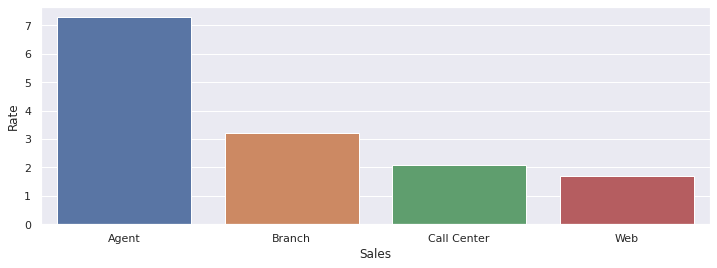

In [11]:
g = sns.barplot(x = 'Sales', y = 'Rate', data=resp_by_sales_rate)
plt.show(g)

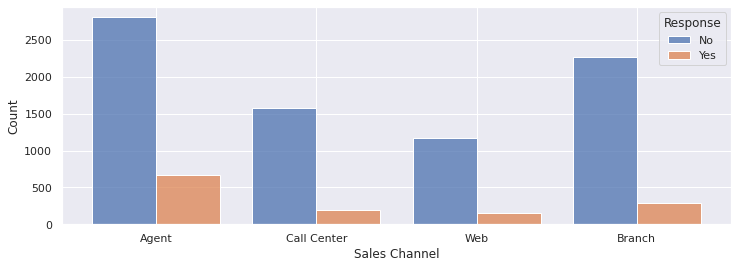

In [12]:
# The way showing the Yes/No answers
g = sns.histplot(data=marketing_df, x='Sales Channel', hue='Response', multiple='dodge', shrink=.8)

In [13]:
# 5. Show a plot of the response rate by the total claim amount.
resp_by_claim = marketing_df[['Response','Total Claim Amount']]
resp_by_claim


,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


In [14]:
# I make groups in order to put the ammounts all together in different bars
num_bars = 8    #we select 8 bars for this plot
rate_list = []
claim_ammount_num = []
claim_ammount_ranges = []
max_value = resp_by_claim['Total Claim Amount'].max()
min_value = resp_by_claim['Total Claim Amount'].min()
range_tot = max_value - min_value
step_size = range_tot/num_bars
print("Min value is: ",min_value)
print("Max value is: ",max_value)
print("Step size is: ",step_size)
for val in list(range(1,num_bars+1)): 
    value = val * step_size + min_value
    claim_ammount_ranges.append(value)
claim_ammount_ranges # This is the vector X on the plot (Groups)

Min value is:  0.099007
Max value is:  2893.239678
Step size is:  361.642583875


[361.741590875,
 723.38417475,
 1085.026758625,
 1446.6693425,
 1808.3119263750002,
 2169.9545102499997,
 2531.597094125,
 2893.239678]

In [15]:
# Now I assign every Claim ammount to a group
helper_list = resp_by_claim['Total Claim Amount']*0
for step in claim_ammount_ranges:
    helper_list = helper_list + ((resp_by_claim['Total Claim Amount'] > float(step))*1)
#     display(helper_list)
resp_by_claim['Total Claim Amount (Group)'] = helper_list
resp_by_claim

<ipython-input-15-6d3d95f2422e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resp_by_claim['Total Claim Amount (Group)'] = helper_list


,Response,Total Claim Amount,Total Claim Amount (Group)
0,No,384.811147,1.0
1,No,1131.464935,3.0
2,No,566.472247,1.0
3,No,529.881344,1.0
4,No,138.130879,0.0
...,...,...,...
9129,No,198.234764,0.0
9130,Yes,379.200000,1.0
9131,No,790.784983,2.0
9132,No,691.200000,1.0


In [16]:
# Now I create the rate for each grouped values
resp_by_claim_rate = resp_by_claim.pivot(columns = 'Total Claim Amount (Group)', values = 'Response')
resp_by_claim_rate = (resp_by_claim_rate == 'Yes').sum()/resp_by_claim_rate.shape[0]*100
resp_by_claim_rate = resp_by_claim_rate.reset_index()
resp_by_claim_rate.columns = ['Group','Rate']
# We use a lambda function for rounding the values in the claim ammount ranges
resp_by_claim_rate['Claim Amount Ranges'] = list(map(lambda x: str(round(x,0)), claim_ammount_ranges))

resp_by_claim_rate

,Group,Rate,Claim Amount Ranges
0,0.0,5.780600,362.0
1,1.0,7.291439,723.0
2,2.0,0.853952,1085.0
3,3.0,0.394132,1447.0
4,4.0,0.000000,1808.0
5,5.0,0.000000,2170.0
6,6.0,0.000000,2532.0
7,7.0,0.000000,2893.0


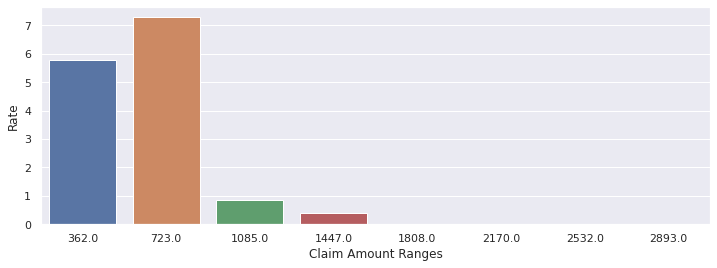

In [17]:
g = sns.barplot(x = 'Claim Amount Ranges', y = 'Rate', data=resp_by_claim_rate)
plt.show(g)

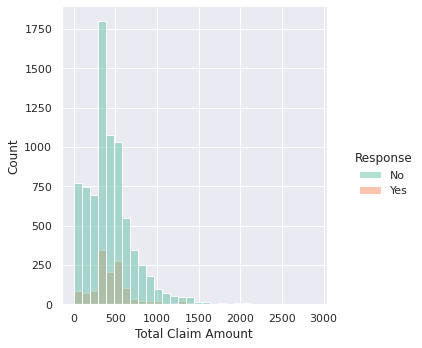

In [18]:
# Another way showing both values (The easiest way, not the manual way...)
sns.displot(x='Total Claim Amount', hue = 'Response', data = marketing_df, bins = 30, palette="Set2")
plt.show()


In [19]:
# 6. Show a plot of the response rate by income.
resp_by_income = marketing_df[['Response','Income']]
resp_by_income

,Response,Income
0,No,56274
1,No,0
2,No,48767
3,No,0
4,No,43836
...,...,...
9129,No,71941
9130,Yes,21604
9131,No,0
9132,No,21941


In [20]:
#I will create the activity from above as a function
def plotRate(df, num_bars = 5, col = 'Total Claim Amount'):
    # I make groups in order to put the ammounts all together in different bars
    #we select 5 bars for this plot as 
    rate_list = []
    df_num = []
    df_ranges = []
    max_value = df[col].max()
    min_value = df[col].min()
    range_tot = max_value - min_value
    step_size = range_tot/num_bars
    print("Min value is: ",min_value)
    print("Max value is: ",max_value)
    print("Step size is: ",step_size)
    for val in list(range(1,num_bars+1)): 
        value = val * step_size + min_value
        df_ranges.append(value)  # This is the vector X on the plot (Groups)
    # print(resp_by_claim)
        
    # Now I assign every Claim ammount to a group
    helper_list = df[col]*0
    for step in df_ranges:
        helper_list = helper_list + ((df[col] > float(step))*1)
    df['Group'] = helper_list
    # print(resp_by_claim)

    # Now I create the rate for each grouped values
    df_rate = df.pivot(columns = 'Group', values = 'Response')
    df_rate = (df_rate == 'Yes').sum()/df_rate.shape[0]*100
    df_rate = df_rate.reset_index()
    df_rate.columns = ['Group','Rate']
    # We use a lambda function for rounding the values in the claim ammount ranges
    df_rate[col] = list(map(lambda x: str(round(x,0)), df_ranges))
    # print(resp_by_claim_rate)
    
    g = sns.barplot(x = col, y = 'Rate', data=df_rate)
    plt.show(g)
    

Min value is:  0
Max value is:  99981
Step size is:  7690.846153846154


<ipython-input-20-49a7cbb7ed61>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = helper_list


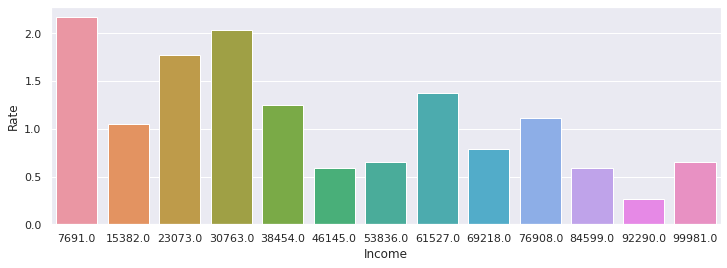

In [21]:
plotRate(resp_by_income, 13, 'Income')

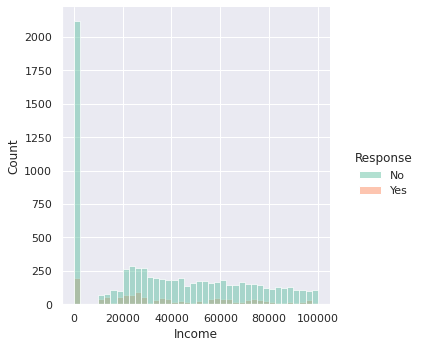

In [22]:
# Same as before , the easiest way, not the manual way...
sns.displot(x='Income', hue = 'Response', data = marketing_df, bins = 40, palette="Set2")
plt.show()

Min value is:  0.099007
Max value is:  2893.239678
Step size is:  241.09505591666667


<ipython-input-20-49a7cbb7ed61>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = helper_list


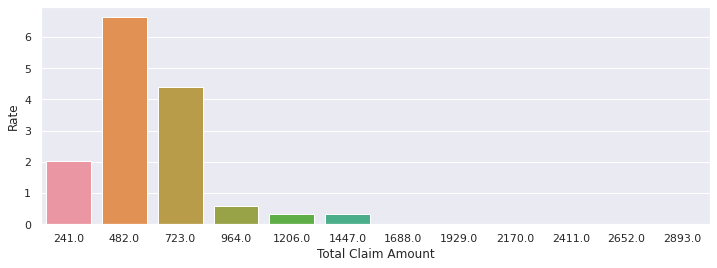

In [23]:
# The function also works for part 5
plotRate(resp_by_claim, 12)